In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact_manual
import ipywidgets as widgets
import torch
import sys
import os
sys.path.append(os.path.expanduser('~/Desktop/Basset_E/'))
from sample.utils.load_model import load_model_E
import numpy as np
from Interpretation.utils import *
import json
import seaborn as sns
PDBX = os.environ['PDBX_UBC']

In [3]:
table  = pd.read_excel(PDBX+'data/sasha_ATAC/tableS1A.xlsx',index_col=1)
a = table.iloc[0]
table = table[1:]
table.columns = a


# Data Loading

In [ ]:
run = '/home/emeunier/Dropbox/UBC/data/Runs_GA/Random_Population'
run2 = '/home/emeunier/Dropbox/UBC/data/Runs_GA/Run_28_11_F_10In_100It'

# Sasha motifs generated count
generated_smotifs = pd.read_csv('{}/global_count_motifs_sasha.csv'.format(run),index_col=0)
generated_smotifs_2 = pd.read_csv('{}/global_count_motifs_sasha.csv'.format(run2),index_col=0)

# Load Model ( please use the same as the one for motif generation)
t = torch.load(os.path.expanduser('~/Dropbox/UBC/Models/Basset_2019-11-04_19_23_35/model_loss_0.68.tar'))
m, _ = load_model_E()
m.load_state_dict(t['model_state_dict'])
m.eval();
activation = lambda x : 8*torch.sigmoid(x)+1
# Load Data
x = np.load(os.path.expanduser(os.path.expanduser('~/Dropbox/UBC/data/perm_one_hot_seqs.npy'))) #load permuted sequences
x = x.astype(np.float32)

In [4]:
run = 'Run_FB_GAN_22_04_3Fold'
generated_smotifs = pd.read_csv(PDBX+'data/Runs_GA/{}/global_count_motifs_sasha.csv'.format(run),index_col=0).fillna(0)
#generated_smotifs = generated_smotifs.drop(columns=['B'])
generated_smotifs.rename(columns={'innate.lym':'lym', 'innate.lym_shuffled':'lym_shuffled'}, inplace=True)

In [12]:
generated_smotifs['B'] = generated_smotifs.loc[:,['fbgan' in x for x in generated_smotifs.columns]].mean(axis=1)
generated_smotifs['general'] = generated_smotifs.loc[:,['wgan' in x for x in generated_smotifs.columns]].mean(axis=1)

In [13]:
groups_publi = {'B':'B', 'myeloid':['DC','MF','Mo','GN'], 'innate.lym':'ILC', 'stem':'Stem', 'abT':'abT', 'gdT':'gdT'}
colors_groups = {'B':"rgb(232,177,21)", 'myeloid':"rgb(228,40,141)", 'innate.lym':"rgb(115,196,79)", 'stem':"rgb(201,201,201)", 'abT':"rgb(250,107,68)", 'gdT':"rgb(95,115,160)"}

In [5]:
generated_smotifs

,Best overall TF match,Motif consensus Sequence
filter1,Atf3,TGAAGGATACGACGACATG
filter6,Ebf1,TTTCCCAATGGAATTTAAG
filter8,Zeb1,GAGGGCGCCCAGGTGAGAG
filter9,MOTIF NOT KNOWN,CGGCTGTACAGTGAACATC
filter10,Runx,TTTGTGGTTTGAATTGTAA
filter11,Ets1,AGACAGGAAGTGGGTGTGG
filter14,Sox13,GGACACACTTCTCAATCAT
filter15,Runx,AAACCACAAAAACAAAAAA
filter23,Ctcf,GCCACTAGGGGGCGCCAGA
filter28,Mafg,GCGGAACTGAAGAGCTCTG


# Analysis


## Generated Sequences Analysis

In [14]:
@interact_manual
def motif_frequence_sasha(ct = generated_smotifs.drop(columns=['Best overall TF match','Motif consensus Sequence']).columns) :
    go.Figure(go.Bar(y = generated_smotifs[ct], x =generated_smotifs.index)).show()

interactive(children=(Dropdown(description='ct', options=('wgan_generated_sequences_2', 'fbgan_generated_seque…

In [15]:
@interact_manual
def motifs_influence_sasha(motif=generated_smotifs.drop(columns=['Best overall TF match','Motif consensus Sequence']).max(axis=1).sort_values(ascending=False).index) :
    dfr = generated_smotifs.drop(columns= ['Best overall TF match','Motif consensus Sequence']).loc[motif]
    fig = go.Figure()
    fig.update_layout(title=" Presence of the motif in Generated Sequences : \n Filter : {} Motif : {} Length : {}".format(motif,generated_smotifs.loc[motif,'Best overall TF match'],len(generated_smotifs.loc[motif,'Motif consensus Sequence'])))
    fig.add_trace(go.Bar(x=dfr.index, y=dfr, name='generated'))
    fig.update_layout({
                           'yaxis': {'title': 'Presence', 'range': [0, 1]},
                           'barmode': 'relative'
                      })
    fig.show()
    h, b, _ = simulate(m, activation, x, motif_string=generated_smotifs.loc[motif,'Motif consensus Sequence'])
    b.update_layout({
                           'yaxis': {'title': 'Activation Motif', 'range': [1, 9]},
                           'barmode': 'relative'
                      })
    b.update_layout(title="Influence of the motif on the activation score")
    b.show()
    h.show()

interactive(children=(Dropdown(description='motif', options=('filter247', 'filter123', 'filter260', 'filter231…

## Compare Motif Importance - Sasha Importance Score

In [10]:
sasha_importance = pd.read_csv(PDBX+'data/sasha_ATAC/influence_bylineage_signed.csv',index_col=0)

In [11]:
fig = go.Figure(go.Bar(x=sasha_importance.index, y=sasha_importance['myeloid']))
fig.update_layout(yaxis_title="Importance im Sasha's model",
                      xaxis_title ="Filter")
fig.show()

In [12]:
print('Number of Motif found : {}/99'.format(len(generated_smotifs.index)))
print('Number of Motif found in less than 5% of the lineages: {}/{}'.format(len(generated_smotifs[generated_smotifs.drop(columns=['Best overall TF match','Motif consensus Sequence']).max(1) < 0.05 ].index),len(generated_smotifs.index)))

Number of Motif found : 99/99
Number of Motif found in less than 5% of the lineages: 6/99


In [13]:
sasha_importance = sasha_importance.loc[sorted(sasha_importance.index,key = lambda x : int(x.replace('filter','')))]
sasha_importance.rename(columns={'lym':'innate.lym'}, inplace=True)
#sasha_importance[sasha_importance < 0] = 0
#n_sasha_importance = (sasha_importance  - sasha_importance.min(0))/(sasha_importance.max(0)-sasha_importance.min(0))
comparaison = pd.merge(sasha_importance, generated_smotifs, left_index=True, right_index=True, suffixes=('_sasha','_generated'), how='left')
comparaison = comparaison.fillna(0)

### Global Importance ( Not Specific to cell types )

In [32]:
fig = go.Figure()
fig.add_trace(go.Bar(x=comparaison.index, y=comparaison[[c for c in comparaison.columns if 'sasha' in c]].max(1)))
fig.add_trace(go.Bar(x = comparaison.index, y=comparaison[[c for c in comparaison.columns if 'generated' in c]].max(1)))
fig.show()
go.Figure(go.Scatter(x = comparaison[[c for c in comparaison.columns if 'generated' in c]].max(1),
                     y = comparaison[[c for c in comparaison.columns if 'sasha' in c]].max(1),
                     mode='markers', text = comparaison.index))

### Importance by cell type

In [43]:
@interact_manual
def motifs_influence_sasha(ct=generated_smotifs.drop(columns=['Best overall TF match','Motif consensus Sequence']).columns) :
    fig = go.Figure(go.Scatter(y = comparaison['{}_generated'.format(ct)],
                         x = comparaison['{}_sasha'.format(ct)],
                         mode='markers+text',
                         text = comparaison['Best overall TF match'],
                         hovertext=comparaison.index,
                         textposition="bottom left"))
    fig.update_layout(title="Comparaison of feature importance for Lineage : {}".format(ct),
                      yaxis_title='Generated Motifs',
                      xaxis_title ="Sashas's motif importance")
    fig.show()


interactive(children=(Dropdown(description='ct', options=('abT', 'stem', 'gdT', 'B', 'innate.lym', 'myeloid'),…

### Heatmaps

In [19]:
ht_map = generated_smotifs[['B.','myeloid.','innate.lym.','abT.','stem.','gdT.']]
fig = go.Figure(go.Heatmap(z=ht_map,
                     x = ht_map.columns,
                     y=ht_map.index))
fig.update_layout(title="Proportion of the motif in the GA results")
fig.show()

In [30]:
fig = go.Figure(go.Heatmap(z=sasha_importance,
                     x = sasha_importance.columns,
                     y=sasha_importance.index))
fig.update_layout(title="Proportion of the motif in the GA results")
fig.show()

## Compare Motif Importance - BassetE Importance Score

In [103]:
be_importance = pd.read_csv(PDBX+'data/sasha_ATAC/Activation_BassetE_FilterS.csv',index_col=0).drop(columns=['Best overall TF match','Motif consensus Sequence'])
#be_importance = (be_importance - 1)/8
be_importance['mean_importance'] =  be_importance.mean(axis=1)
comparaison_be = pd.merge(be_importance,
                       generated_smotifs,
                       left_index=True, right_index=True, suffixes=('_be','_generated'), how='left')
comparaison_be = comparaison_be.fillna(0)

In [106]:
fig = go.Figure(go.Scatter(y = comparaison_be['Random'],
                     x = comparaison_be['memoryview'],
                     mode='markers+text',
                     text = comparaison_be['Best overall TF match'],
                     hovertext=comparaison_be.index,
                     textposition="bottom left"))
fig.update_layout(title="Comparaison of feature importance for Lineage : {}".format('B'),
                  yaxis_title='Generated Motifs',
                  xaxis_title ="BassetE's motif importance")
fig.show()

KeyError: 'Random'

In [109]:
@interact_manual
def motifs_influence_sasha(ct=generated_smotifs.drop(columns=['Best overall TF match','Motif consensus Sequence']).columns) :
    fig = go.Figure(go.Scatter(y = comparaison_be['{}_generated'.format(ct)],
                         x = comparaison_be['{}_be'.format(ct)],
                         mode='markers+text',
                         text = comparaison_be['Best overall TF match'],
                         hovertext=comparaison_be.index,
                         textposition="bottom left"))
    fig.update_layout(title="Comparaison of feature importance for Lineage : {}".format(ct),
                      yaxis_title='Generated Motifs',
                      xaxis_title ="BassetE's motif importance")
    fig.show()


interactive(children=(Dropdown(description='ct', options=('B', 'innate.lym', 'abT', 'gdT', 'stem', 'myeloid'),…

# Graph Poster

In [16]:
def draw_scatter_importance(data, x_field, y_field, x_lbl, y_lbl) :
    plt.figure(figsize=(20,15))
    p1 = sns.scatterplot(x=x_field, y=y_field, hue='Reproducibility', palette=sns.color_palette('rainbow',3), s=40, linewidth=0,legend='full',data=aga)


    for line in range(0,aga.shape[0]):
         if aga['Best overall TF match'][line] != 'MOTIF NOT KNOWN' and ( aga[x_field][line] >  4 or aga[y_field][line] > 0.3 or aga[x_field][line] <  -500 ) :
             p1.text(aga[x_field][line]+np.random.rand()/30, aga[y_field][line]+(np.random.rand()-0.5)/30, 
             aga['Best overall TF match'][line], horizontalalignment='left', 
             size='medium', color='black', weight='semibold')
    plt.xlabel(x_lbl, fontsize=15)
    plt.ylabel(y_lbl, fontsize=15)
    plt.ylim([0,1])

In [21]:
comparaison_s

,B_be,abT,gdT,myeloid,lym,stem,wgan_generated_sequences_2,fbgan_generated_sequences_1,wgan_generated_sequences_3,wgan_generated_sequences_1,fbgan_generated_sequences_2,fbgan_generated_sequences_3,Best overall TF match,Motif consensus Sequence,B_generated,general
filter1,-2.875371,-3.934621,-4.030415,39.203693,14.286764,-3.645009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Atf3,TGAAGGATACGACGACATG,0.000000,0.000000
filter10,-298.715670,289.613340,302.807530,-402.545170,1702.575600,735.223400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Runx,TTTGTGGTTTGAATTGTAA,0.000000,0.000000
filter102,-92.425530,-41.337820,-34.300816,412.902130,-53.258330,-129.697250,0.000000,0.000000,0.226406,0.000313,0.000000,0.015938,MOTIF NOT KNOWN,CACCTCCCAGCCTTCTCCC,0.005313,0.075573
filter105,32.015620,1.184324,-0.577617,5.427286,-25.466425,21.060986,0.000156,0.000000,0.000000,0.000000,0.000000,0.000000,MOTIF NOT KNOWN,AAGAAGAAGAAAGAAAGGA,0.000000,0.000052
filter106,41.984170,-29.547127,-59.325344,-58.681840,1786.195000,-86.328690,0.000000,0.000000,0.000156,0.000000,0.000000,0.000000,Tbx21,GAAAAAAAGGAAGTGTGAA,0.000000,0.000052
filter11,6.453993,461.445500,590.312100,-1090.827300,2191.330800,1178.589200,0.000156,0.000000,0.000313,0.000313,0.000000,0.016250,Ets1,AGACAGGAAGTGGGTGTGG,0.005417,0.000260
filter112,852.595600,134.868740,-110.139404,-105.569534,-671.724600,-493.897860,0.000313,0.038437,0.000000,0.000000,0.000000,0.887656,Tcf3,AGCCGAAGCAGCTGTTCGC,0.308698,0.000104
filter115,105.171326,27.599287,-132.369140,106.908990,-337.560000,140.808750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Hlx,AGCCCTCAGAGTCATTCAA,0.000000,0.000000
filter120,-30.515360,76.075900,108.659930,-269.630200,487.639900,163.622700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Ets,CCCACCCACTTCCGGTCTG,0.000000,0.000000
filter122,9.672769,-40.479680,-42.842506,175.237820,-16.898901,64.300670,0.000000,0.000000,0.019531,0.000000,0.000000,0.003438,Ellf1,TCAGGAAGTGACAGGGATG,0.001146,0.006510


## Using Sasha Activation Scores

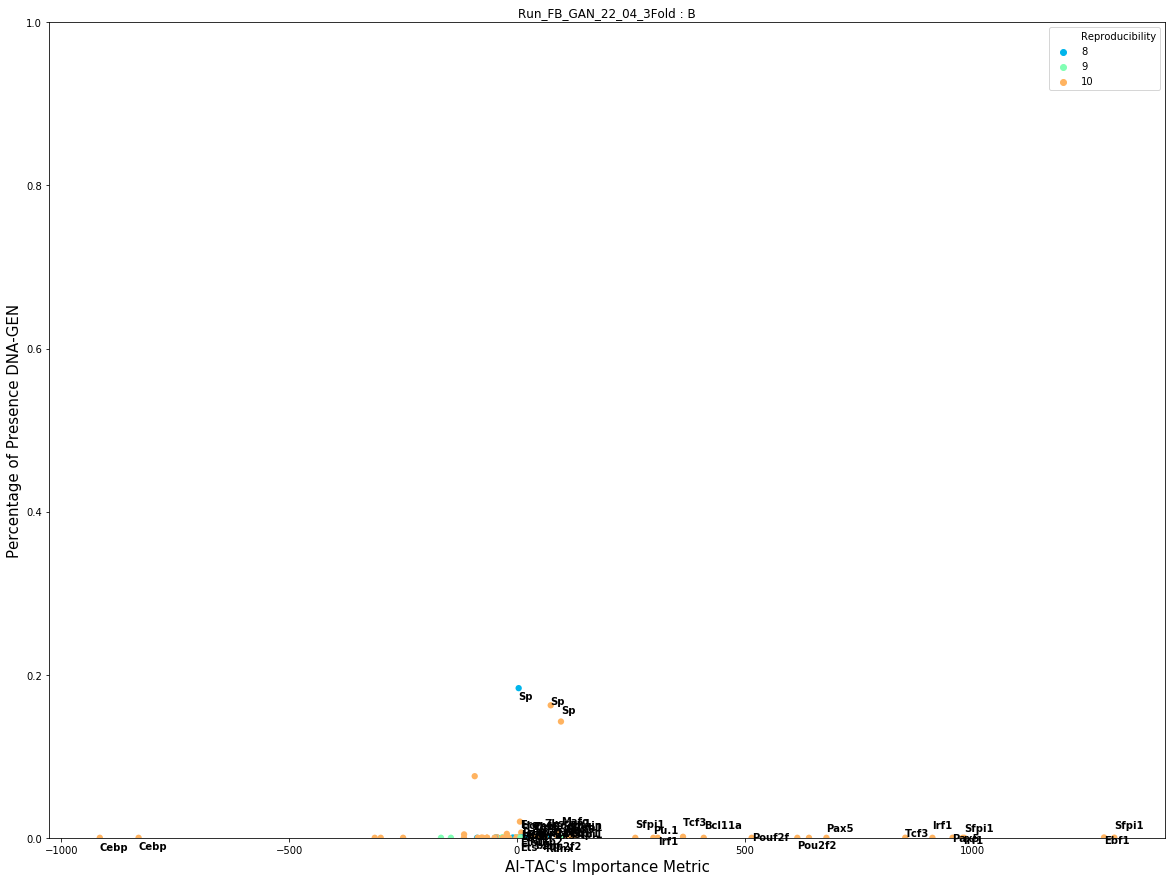

In [22]:
s_importance = pd.read_csv(PDBX+'data/sasha_ATAC/influence_bylineage_signed.csv',index_col=0)

comparaison_s = pd.merge(s_importance,
                        generated_smotifs,
                        left_index=True, right_index=True,
                        suffixes=('_be','_generated'), how='left')

comparaison_s = comparaison_s.fillna(0)
aga = pd.merge(comparaison_s,table[['Reproducibility']], left_index=True, right_index=True)
ct = 'B'
draw_scatter_importance(aga, ct+'_be', 'general', "AI-TAC's Importance Metric","Percentage of Presence DNA-GEN" )
plt.title('{} : {}'.format(run, ct))
plt.show()

In [ ]:
s_importance = pd.read_csv(PDBX+'data/sasha_ATAC/influence_bylineage_signed.csv',index_col=0)

comparaison_s = pd.merge(s_importance,
                        generated_smotifs,
                        left_index=True, right_index=True,
                        suffixes=('_be','_generated'), how='left')

comparaison_s = comparaison_s.fillna(0)
aga = pd.merge(comparaison_s,table[['Reproducibility']], left_index=True, right_index=True)
    
for ct in generated_smotifs.drop(columns=['Best overall TF match', 'Motif consensus Sequence']).columns :
    if 'shuffled' not in ct :
        draw_scatter_importance(aga, ct+'_be', ct+'_generated', "AI-TAC's Importance Metric","Percentage of Presence DNA-GEN" )
    else : 
        draw_scatter_importance(aga, ct.replace('shuffled','')+'be', ct, "AI-TAC's Importance Metric","Percentage of Presence DNA-GEN" )        
    plt.title('{} : {}'.format(run, ct))
    plt.show()

In [93]:
comparaison_s['B_generated'].max()

0.00203125

## Using Basset E Activation Scores

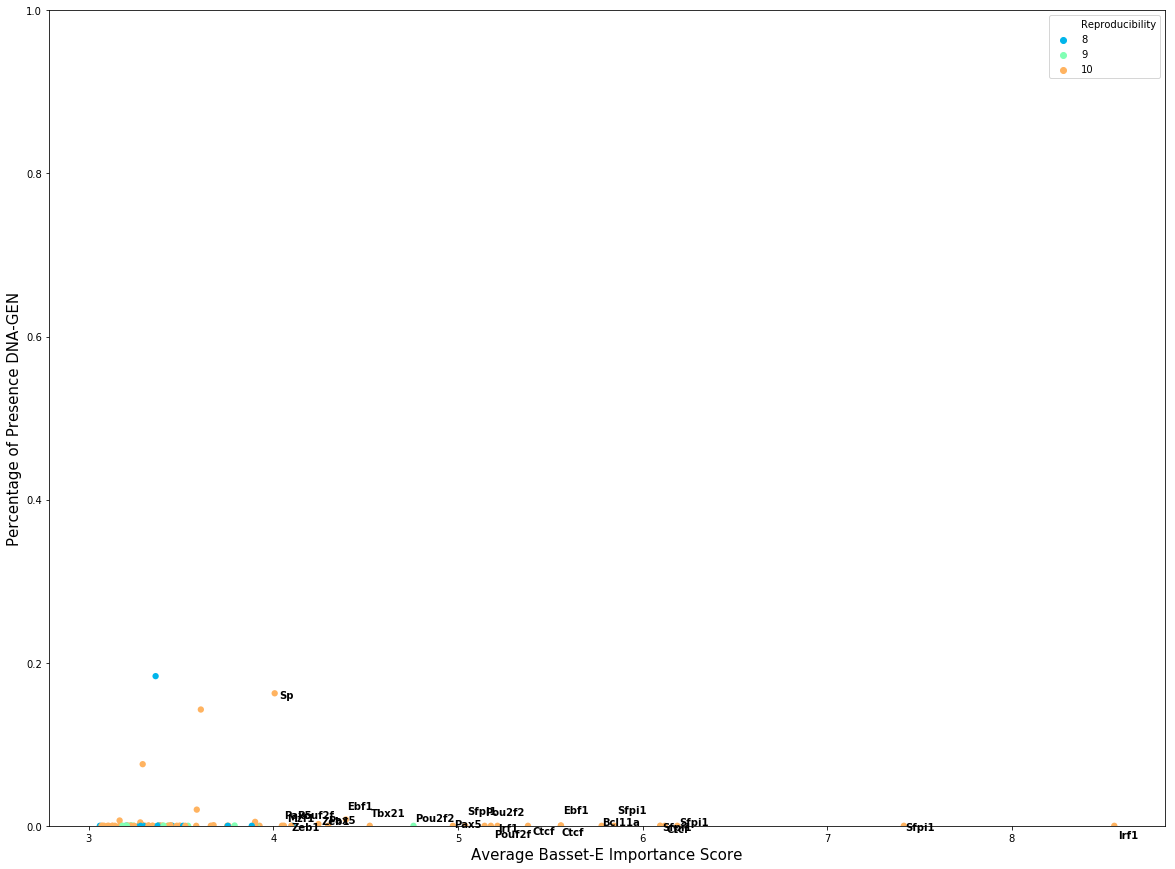

In [24]:
be_importance = pd.read_csv(PDBX+'data/sasha_ATAC/Activation_BassetE_FilterS.csv',index_col=0).drop(columns=['Best overall TF match','Motif consensus Sequence'])

comparaison_be = pd.merge(be_importance,
                       generated_smotifs,
                       left_index=True, right_index=True, suffixes=('_be','_generated'), how='left')
comparaison_be = comparaison_be.fillna(0)
aga = pd.merge(comparaison_be,table[['Reproducibility']], left_index=True, right_index=True)
draw_scatter_importance(aga, 'B_be', 'general', "Average Basset-E Importance Score","Percentage of Presence DNA-GEN" )